***

## Problem 1. Edge Detection (50%)

***

### a)

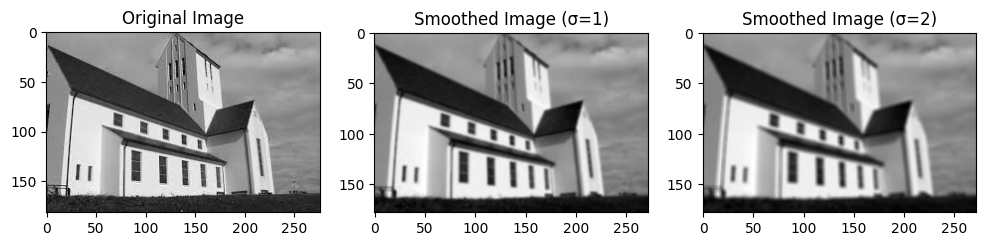

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple, Union










def gaussian_filter(window_size, sigma):
    kernel = np.zeros((window_size, window_size))
    center = window_size // 2
    for x in range(window_size):
        for y in range(window_size):
            right = np.exp(-(((x-center)**2 + (y-center)**2) / (2 * sigma**2)))
            left = 1 / ((sigma ** 2) * (2 * np.pi))
            kernel[x,y] = left * right
    # Normalize the kernel
    # kernel /= np.sum(kernel)
    # kernel /= kernel[0][0]
    return kernel
# print(gaussian_filter(5,1))


## graph
# def get_gaussian_derivatives_x_filter(window_size, sigma):

#     # left =  - ( x / (2 pi simg**4))
#     # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
#     kernel = np.zeros((window_size, window_size))
#     center = window_size // 2
#     for x in range(window_size):
#         for y in range(window_size):
#             right = np.exp(-(((x-center)**2 + (y-center)**2) / (2 * sigma**2)))
#             left = - ((y-center) / (sigma ** 2))
#             # left = - ((y-center) / (2 * np.pi * sigma ** 4))
#             kernel[x,y] = left * right
#     # Normalize the kernel
#     # kernel /= np.sum(kernel)
#     # kernel /= kernel[0][0]
#     return kernel
# print(get_gaussian_derivatives_x_filter(5,1))

# def get_gaussian_derivatives_y_filter(window_size, sigma):

#     # left =  - ( x / (2 pi simg**4))
#     # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
#     kernel = np.zeros((window_size, window_size))
#     center = window_size // 2
#     for x in range(window_size):
#         for y in range(window_size):
#             right = np.exp(-(((x-center)**2 + (y-center)**2) / (2 * sigma**2)))
#             left = - ((x-center) / (sigma ** 2))
#             # left = - ((x-center) / (2 * np.pi * sigma ** 4))
#             kernel[x,y] = left * right
#     # Normalize the kernel
#     # kernel /= np.sum(kernel)
#     # kernel /= kernel[0][0]
#     return kernel
# print(get_gaussian_derivatives_y_filter(5,1))



## slides gaussian derivative
def get_gaussian_derivatives_x_filter(window_size, sigma):

    # left =  - ( x / (2 pi simg**4))
    # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
    kernel = np.zeros((window_size, window_size))
    center = window_size // 2
    for i in range(window_size):
        for j in range(window_size):
            x = j - center
            y= center - i
            right = np.exp(-(((j - center)**2 + (center - i)**2) / (2 * sigma**2)))
            left = - ((j - center) / (sigma ** 2))
            # left = - ((j - center) / (2 * np.pi * sigma ** 4))
            kernel[i,j] = left * right
    # Normalize the kernel
    # kernel /= np.sum(kernel)
    # kernel /= kernel[0][0]
    return kernel
# print(get_gaussian_derivatives_x_filter(5,1))

def get_gaussian_derivatives_y_filter(window_size, sigma):

    # left =  - ( x / (2 pi simg**4))
    # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
    kernel = np.zeros((window_size, window_size))
    center = window_size // 2
    for i in range(window_size):
        for j in range(window_size):
            x = j - center
            y= center - i
            right = np.exp(-(((j - center)**2 + (center - i)**2) / (2 * sigma**2)))
            left = - ((center - i)/ (sigma ** 2))
            # left = - ((center - i)/ (2 * np.pi * sigma ** 4))
            kernel[i,j] = left * right
    # Normalize the kernel
    # kernel /= np.sum(kernel)
    # kernel /= kernel[0][0]
    return kernel
# print(get_gaussian_derivatives_y_filter(5,1))

## convolution
## ref: https://github.com/detkov/Convolution-From-Scratch
## rework
def add_padding(matrix: np.ndarray, padding: Tuple[int, int]) -> np.ndarray:
    n, m = matrix.shape
    r, c = padding
    # padding row = matrix row + two * kernel row
    padded_matrix = np.zeros((n + r * 2, m + c * 2))
    # copy matrix to padding matrix with original context
    padded_matrix[r : n + r, c : m + c] = matrix
    return padded_matrix


def _check_params(matrix, kernel, stride: Tuple[int, int], dilation: Tuple[int, int], padding: Tuple[int, int]):
    # all integers should be positive >= 1
    params_are_correct = (isinstance(stride[0], int)   and isinstance(stride[1], int)   and
                          isinstance(dilation[0], int) and isinstance(dilation[1], int) and
                          isinstance(padding[0], int)  and isinstance(padding[1], int)  and
                          stride[0]   >= 1 and stride[1]   >= 1 and 
                          dilation[0] >= 1 and dilation[1] >= 1 and
                          padding[0]  >= 0 and padding[1]  >= 0)
    # condition failed
    if not params_are_correct:
        assert params_are_correct, 'Parameters should be integers equal or greater than default values.'
        return None
    # convert matrix to np array
    if not isinstance(matrix, np.ndarray):
        matrix = np.array(matrix)
    n, m = matrix.shape
    # check if any padding, yes reconstruct
    if list(padding) == [0, 0]:
        matrix = matrix
    else:
        matrix = add_padding(matrix, padding)
    n_p, m_p = matrix.shape

    # convert kernel to np array
    if not isinstance(kernel, np.ndarray):
        kernel = np.array(kernel)
    k = kernel.shape
    matrix_to_kernel_is_correct = n_p >= k[0] and m_p >= k[1]
    assert matrix_to_kernel_is_correct, 'Kernel shape must smaller than matrix shape'
    
    # output matrix shape after convolution
    # (Input window_size + 2*Padding – ((Filter window_size – 1)*Dilation Factor + 1))/Stride + 1
    r_out = np.floor((n + 2 * padding[0] - ( (dilation[0]*(k[0]-1)) +1) ) / stride[0]).astype(int) + 1
    c_out = np.floor((m + 2 * padding[1] - ( (dilation[1]*(k[1]-1)) +1) ) / stride[1]).astype(int) + 1

    out_dimensions_true = r_out > 0 and c_out > 0
    assert out_dimensions_true, 'One of resulting output dimension is non-positive.'

    return matrix, kernel, r_out, c_out

## convolution
## ref: https://github.com/detkov/Convolution-From-Scratch
## rework
def convolution2d(matrix: Union[List[List[float]], np.ndarray], kernel: Union[List[List[float]], np.ndarray], stride: Tuple[int, int] = (1, 1), dilation: Tuple[int, int] = (1, 1), padding: Tuple[int, int] = (0, 0)) -> np.ndarray:
    # check matrix, kernel is correct shape
    matrix, kernel, h_out, w_out = _check_params(matrix, kernel, stride, dilation, padding)
    # set output shape
    matrix_out = np.zeros((h_out, w_out))

    # find center kernel position
    b = (kernel.shape[0] // 2, kernel.shape[1] // 2)
    # find input matrix center position
    center_x_0 = b[0] * dilation[0]
    center_y_0 = b[1] * dilation[1]
    # start input matrix height |
    for i in range(h_out):
        # find positions of height x, in the submatrix
        center_x = center_x_0 + i * stride[0]
        # get all rows index in the submatrix
        indices_x = [center_x + l * dilation[0] for l in range(-b[0], b[0] + 1)]
        
        for j in range(w_out):
            # find the positions of width y, in the submatrix
            center_y = center_y_0 + j * stride[1]
            # get all index y of the submatrix
            indices_y = [center_y + l * dilation[1] for l in range(-b[1], b[1] + 1)]
            # find the submatrix
            submatrix = matrix[indices_x, :][:, indices_y]
            # element-wise mutiple and sum all the results
            matrix_out[i][j] = np.sum(np.multiply(submatrix, kernel))
    return matrix_out

## sobel operation
def get_sobel_x_3_3(gradient_value = 1/8, omits= False):
    standard_sobel_operator = np.array([[-1,0,1],
                                        [-2,0,2],
                                        [-1,0,1],
                                        ], dtype="float64")
    gradient_value = gradient_value
    if not omits:
        standard_sobel_operator *= gradient_value
            
    return standard_sobel_operator


def get_sobel_y_3_3(gradient_value = 1/8, omits= False):
    standard_sobel_operator = np.array([[1,2,1],
                                        [0,0,0],
                                        [-1,-2,-1],
                                        ], dtype="float64")
    gradient_value = gradient_value
    if not omits:
        standard_sobel_operator *= gradient_value
            
    return standard_sobel_operator

def get_edge_map(gradient_x, gradient_y):
    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # # Normalize the gradient magnitude to convert it to the range [0, 255]
    # gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return gradient_magnitude



image = cv2.imread("ex1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# part a1

plt.figure(figsize=(12,12))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
# plt.axis('off')

window_size = 5  # Kernel window_size (should be odd)
sigma = 1  # Standard deviation of Gaussian distribution

gaussian_kernel_5_1 = gaussian_filter(window_size, sigma)
smoothed_image_5_1 = convolution2d(gray_image, gaussian_kernel_5_1)


plt.subplot(1, 3, 2)
plt.imshow(smoothed_image_5_1, cmap='gray')
plt.title('Smoothed Image (\u03C3={})'.format(sigma) )
# plt.axis('off')


# part a2

window_size = 5  
sigma = 2  

gaussian_kernel_5_2 = gaussian_filter(window_size, sigma)
smoothed_image_5_2 = convolution2d(gray_image, gaussian_kernel_5_2)

plt.subplot(1, 3, 3)
plt.imshow(smoothed_image_5_2, cmap='gray')
plt.title('Smoothed Image (\u03C3={})'.format(sigma) )
# plt.axis('off')
plt.show()


# # part b1

# window_size = 5
# sigma = 1

# gaussian_kernel_5_1 = gaussian_filter(window_size, sigma)
# smoothed_image_5_1 = convolution2d(gray_image, gaussian_kernel_5_1)

# # gaussian_kernel_5_1 = gaussian_filter(window_size, sigma)
# # smoothed_image_5_1 = convolution2d(gray_image, gaussian_kernel_5_1)

# sobel_operator_x = get_sobel_x_3_3(omits=True)
# sobel_operator_y = get_sobel_y_3_3(omits=True)


# sobel_operator_x_ed_5_1_image = convolution2d(smoothed_image_5_1, sobel_operator_x)
# sobel_operator_y_ed_5_1_image = convolution2d(smoothed_image_5_1, sobel_operator_y)


# sobel_operator_xy_ed_5_1_image = get_edge_map(sobel_operator_x_ed_5_1_image,sobel_operator_y_ed_5_1_image)

# plt.figure(figsize=(12,12))

# plt.subplot(1, 4, 1)
# plt.imshow(smoothed_image_5_1, cmap='gray')
# plt.title('Smoothed Image (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 2)
# plt.imshow(sobel_operator_x_ed_5_1_image, cmap='gray')
# plt.title('X Edge, (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 3)
# plt.imshow(sobel_operator_y_ed_5_1_image, cmap='gray')
# plt.title('Y Edge, (\u03C3={})'.format(sigma) )
# # plt.axis('off')


# plt.subplot(1, 4, 4)
# plt.imshow(sobel_operator_xy_ed_5_1_image, cmap='gray')
# plt.title('Edge map, (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.show()


# # part b2

# window_size = 5
# sigma = 2  

# gaussian_kernel_5_2 = gaussian_filter(window_size, sigma)
# smoothed_image_5_2 = convolution2d(gray_image, gaussian_kernel_5_2)

# # gaussian_kernel_5_2 = gaussian_filter(window_size, sigma)
# # smoothed_image_5_2 = convolution2d(gray_image, gaussian_kernel_5_2)

# sobel_operator_x = get_sobel_x_3_3(omits=True)
# sobel_operator_y = get_sobel_y_3_3(omits=True)

# sobel_operator_x_ed_5_2_image = convolution2d(smoothed_image_5_2, sobel_operator_x)
# sobel_operator_y_ed_5_2_image = convolution2d(smoothed_image_5_2, sobel_operator_y)


# sobel_operator_xy_ed_5_2_image = get_edge_map(sobel_operator_x_ed_5_2_image,sobel_operator_y_ed_5_2_image)


# plt.figure(figsize=(12,12))

# plt.subplot(1, 4, 1)
# plt.imshow(smoothed_image_5_2, cmap='gray')
# plt.title('Smoothed Image (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 2)
# plt.imshow(sobel_operator_x_ed_5_2_image, cmap='gray')
# plt.title('X Edge, (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 3)
# plt.imshow(sobel_operator_y_ed_5_2_image, cmap='gray')
# plt.title('Y Edge, (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 4)
# plt.imshow(sobel_operator_xy_ed_5_2_image, cmap='gray')
# plt.title('Edge map, (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.show()


# # part c

# window_size = 5
# sigma = 1  


# gaussian_derivatives_x_filter_5_1 = get_gaussian_derivatives_x_filter(window_size,sigma)
# gaussian_derivatives_y_filter_5_1 = get_gaussian_derivatives_y_filter(window_size,sigma)

# gaussian_derivatives_x_filter_5_1_image = convolution2d(gray_image, gaussian_derivatives_x_filter_5_1)
# gaussian_derivatives_y_filter_5_1_image = convolution2d(gray_image, gaussian_derivatives_y_filter_5_1)

# gaussian_derivatives_xy_filter_5_1_image = get_edge_map(gaussian_derivatives_x_filter_5_1_image,gaussian_derivatives_y_filter_5_1_image)


# plt.figure(figsize=(12,12))

# plt.subplot(1, 4, 1)
# plt.imshow(gray_image, cmap='gray')
# plt.title('Original Image{}'.format("") )
# # plt.axis('off')

# plt.subplot(1, 4, 2)
# plt.imshow(gaussian_derivatives_x_filter_5_1_image, cmap='gray')
# plt.title('Gaussian D (dG/dx), \u03C3={}'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 3)
# plt.imshow(gaussian_derivatives_y_filter_5_1_image, cmap='gray')
# plt.title('Gaussian D (dG/dy), \u03C3={}'.format(sigma) )
# # plt.axis('off')


# plt.subplot(1, 4, 4)
# plt.imshow(gaussian_derivatives_xy_filter_5_1_image, cmap='gray')
# plt.title('Gaussian D Edge map, \u03C3={}'.format(sigma) )
# # plt.axis('off')

# plt.show()



# window_size = 5
# sigma = 2


# gaussian_derivatives_x_filter_5_2 = get_gaussian_derivatives_x_filter(window_size,sigma)
# gaussian_derivatives_y_filter_5_2 = get_gaussian_derivatives_y_filter(window_size,sigma)


# gaussian_derivatives_x_filter_5_2_image = convolution2d(gray_image, gaussian_derivatives_x_filter_5_2)
# gaussian_derivatives_y_filter_5_2_image = convolution2d(gray_image, gaussian_derivatives_y_filter_5_2)

# gaussian_derivatives_xy_filter_5_2_image = get_edge_map(gaussian_derivatives_x_filter_5_2_image,gaussian_derivatives_y_filter_5_2_image)


# plt.figure(figsize=(12,12))

# plt.subplot(1, 4, 1)
# plt.imshow(gray_image, cmap='gray')
# plt.title('Original Image{}'.format("") )
# # plt.axis('off')

# plt.subplot(1, 4, 2)
# plt.imshow(gaussian_derivatives_x_filter_5_2_image, cmap='gray')
# plt.title('Gaussian D (dG/dx), \u03C3={}'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 3)
# plt.imshow(gaussian_derivatives_y_filter_5_2_image, cmap='gray')
# plt.title('Gaussian D (dG/dy), \u03C3={}'.format(sigma) )
# # plt.axis('off')


# plt.subplot(1, 4, 4)
# plt.imshow(gaussian_derivatives_xy_filter_5_2_image, cmap='gray')
# plt.title('Gaussian D Edge map, \u03C3={}'.format(sigma) )
# # plt.axis('off')

# plt.show()

***

### b)

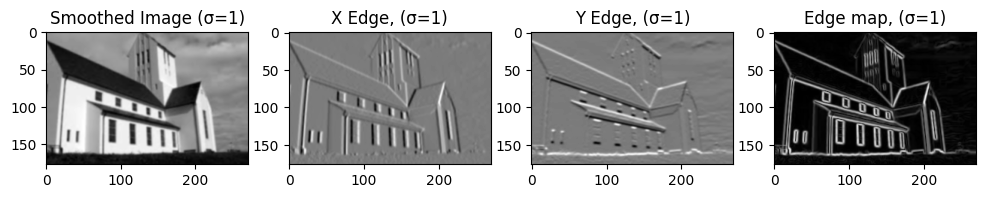

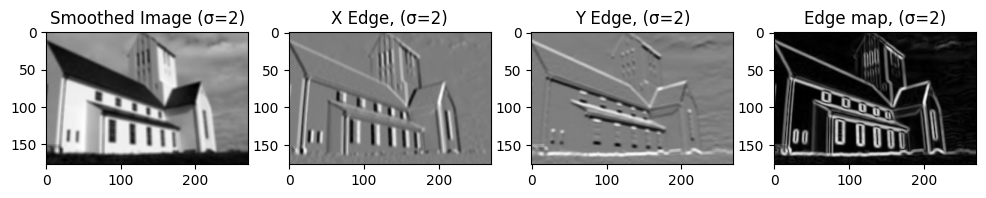

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple, Union










def gaussian_filter(window_size, sigma):
    kernel = np.zeros((window_size, window_size))
    center = window_size // 2
    for x in range(window_size):
        for y in range(window_size):
            right = np.exp(-(((x-center)**2 + (y-center)**2) / (2 * sigma**2)))
            left = 1 / ((sigma ** 2) * (2 * np.pi))
            kernel[x,y] = left * right
    # Normalize the kernel
    # kernel /= np.sum(kernel)
    # kernel /= kernel[0][0]
    return kernel
# print(gaussian_filter(5,1))


## graph
# def get_gaussian_derivatives_x_filter(window_size, sigma):

#     # left =  - ( x / (2 pi simg**4))
#     # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
#     kernel = np.zeros((window_size, window_size))
#     center = window_size // 2
#     for x in range(window_size):
#         for y in range(window_size):
#             right = np.exp(-(((x-center)**2 + (y-center)**2) / (2 * sigma**2)))
#             left = - ((y-center) / (sigma ** 2))
#             # left = - ((y-center) / (2 * np.pi * sigma ** 4))
#             kernel[x,y] = left * right
#     # Normalize the kernel
#     # kernel /= np.sum(kernel)
#     # kernel /= kernel[0][0]
#     return kernel
# print(get_gaussian_derivatives_x_filter(5,1))

# def get_gaussian_derivatives_y_filter(window_size, sigma):

#     # left =  - ( x / (2 pi simg**4))
#     # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
#     kernel = np.zeros((window_size, window_size))
#     center = window_size // 2
#     for x in range(window_size):
#         for y in range(window_size):
#             right = np.exp(-(((x-center)**2 + (y-center)**2) / (2 * sigma**2)))
#             left = - ((x-center) / (sigma ** 2))
#             # left = - ((x-center) / (2 * np.pi * sigma ** 4))
#             kernel[x,y] = left * right
#     # Normalize the kernel
#     # kernel /= np.sum(kernel)
#     # kernel /= kernel[0][0]
#     return kernel
# print(get_gaussian_derivatives_y_filter(5,1))



## slides gaussian derivative
def get_gaussian_derivatives_x_filter(window_size, sigma):

    # left =  - ( x / (2 pi simg**4))
    # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
    kernel = np.zeros((window_size, window_size))
    center = window_size // 2
    for i in range(window_size):
        for j in range(window_size):
            x = j - center
            y= center - i
            right = np.exp(-(((j - center)**2 + (center - i)**2) / (2 * sigma**2)))
            left = - ((j - center) / (sigma ** 2))
            # left = - ((j - center) / (2 * np.pi * sigma ** 4))
            kernel[i,j] = left * right
    # Normalize the kernel
    # kernel /= np.sum(kernel)
    # kernel /= kernel[0][0]
    return kernel
# print(get_gaussian_derivatives_x_filter(5,1))

def get_gaussian_derivatives_y_filter(window_size, sigma):

    # left =  - ( x / (2 pi simg**4))
    # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
    kernel = np.zeros((window_size, window_size))
    center = window_size // 2
    for i in range(window_size):
        for j in range(window_size):
            x = j - center
            y= center - i
            right = np.exp(-(((j - center)**2 + (center - i)**2) / (2 * sigma**2)))
            left = - ((center - i)/ (sigma ** 2))
            # left = - ((center - i)/ (2 * np.pi * sigma ** 4))
            kernel[i,j] = left * right
    # Normalize the kernel
    # kernel /= np.sum(kernel)
    # kernel /= kernel[0][0]
    return kernel
# print(get_gaussian_derivatives_y_filter(5,1))

## convolution
## ref: https://github.com/detkov/Convolution-From-Scratch
## rework
def add_padding(matrix: np.ndarray, padding: Tuple[int, int]) -> np.ndarray:
    n, m = matrix.shape
    r, c = padding
    # padding row = matrix row + two * kernel row
    padded_matrix = np.zeros((n + r * 2, m + c * 2))
    # copy matrix to padding matrix with original context
    padded_matrix[r : n + r, c : m + c] = matrix
    return padded_matrix


def _check_params(matrix, kernel, stride: Tuple[int, int], dilation: Tuple[int, int], padding: Tuple[int, int]):
    # all integers should be positive >= 1
    params_are_correct = (isinstance(stride[0], int)   and isinstance(stride[1], int)   and
                          isinstance(dilation[0], int) and isinstance(dilation[1], int) and
                          isinstance(padding[0], int)  and isinstance(padding[1], int)  and
                          stride[0]   >= 1 and stride[1]   >= 1 and 
                          dilation[0] >= 1 and dilation[1] >= 1 and
                          padding[0]  >= 0 and padding[1]  >= 0)
    # condition failed
    if not params_are_correct:
        assert params_are_correct, 'Parameters should be integers equal or greater than default values.'
        return None
    # convert matrix to np array
    if not isinstance(matrix, np.ndarray):
        matrix = np.array(matrix)
    n, m = matrix.shape
    # check if any padding, yes reconstruct
    if list(padding) == [0, 0]:
        matrix = matrix
    else:
        matrix = add_padding(matrix, padding)
    n_p, m_p = matrix.shape

    # convert kernel to np array
    if not isinstance(kernel, np.ndarray):
        kernel = np.array(kernel)
    k = kernel.shape
    matrix_to_kernel_is_correct = n_p >= k[0] and m_p >= k[1]
    assert matrix_to_kernel_is_correct, 'Kernel shape must smaller than matrix shape'
    
    # output matrix shape after convolution
    # (Input window_size + 2*Padding – ((Filter window_size – 1)*Dilation Factor + 1))/Stride + 1
    r_out = np.floor((n + 2 * padding[0] - ( (dilation[0]*(k[0]-1)) +1) ) / stride[0]).astype(int) + 1
    c_out = np.floor((m + 2 * padding[1] - ( (dilation[1]*(k[1]-1)) +1) ) / stride[1]).astype(int) + 1

    out_dimensions_true = r_out > 0 and c_out > 0
    assert out_dimensions_true, 'One of resulting output dimension is non-positive.'

    return matrix, kernel, r_out, c_out

## convolution
## ref: https://github.com/detkov/Convolution-From-Scratch
## rework
def convolution2d(matrix: Union[List[List[float]], np.ndarray], kernel: Union[List[List[float]], np.ndarray], stride: Tuple[int, int] = (1, 1), dilation: Tuple[int, int] = (1, 1), padding: Tuple[int, int] = (0, 0)) -> np.ndarray:
    # check matrix, kernel is correct shape
    matrix, kernel, h_out, w_out = _check_params(matrix, kernel, stride, dilation, padding)
    # set output shape
    matrix_out = np.zeros((h_out, w_out))

    # find center kernel position
    b = (kernel.shape[0] // 2, kernel.shape[1] // 2)
    # find input matrix center position
    center_x_0 = b[0] * dilation[0]
    center_y_0 = b[1] * dilation[1]
    # start input matrix height |
    for i in range(h_out):
        # find positions of height x, in the submatrix
        center_x = center_x_0 + i * stride[0]
        # get all rows index in the submatrix
        indices_x = [center_x + l * dilation[0] for l in range(-b[0], b[0] + 1)]
        
        for j in range(w_out):
            # find the positions of width y, in the submatrix
            center_y = center_y_0 + j * stride[1]
            # get all index y of the submatrix
            indices_y = [center_y + l * dilation[1] for l in range(-b[1], b[1] + 1)]
            # find the submatrix
            submatrix = matrix[indices_x, :][:, indices_y]
            # element-wise mutiple and sum all the results
            matrix_out[i][j] = np.sum(np.multiply(submatrix, kernel))
    return matrix_out

## sobel operation
def get_sobel_x_3_3(gradient_value = 1/8, omits= False):
    standard_sobel_operator = np.array([[-1,0,1],
                                        [-2,0,2],
                                        [-1,0,1],
                                        ], dtype="float64")
    gradient_value = gradient_value
    if not omits:
        standard_sobel_operator *= gradient_value
            
    return standard_sobel_operator


def get_sobel_y_3_3(gradient_value = 1/8, omits= False):
    standard_sobel_operator = np.array([[1,2,1],
                                        [0,0,0],
                                        [-1,-2,-1],
                                        ], dtype="float64")
    gradient_value = gradient_value
    if not omits:
        standard_sobel_operator *= gradient_value
            
    return standard_sobel_operator

def get_edge_map(gradient_x, gradient_y):
    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # # Normalize the gradient magnitude to convert it to the range [0, 255]
    # gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return gradient_magnitude



image = cv2.imread("ex1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # part a1

# plt.figure(figsize=(12,12))

# plt.subplot(1, 3, 1)
# plt.imshow(gray_image, cmap='gray')
# plt.title('Original Image')
# # plt.axis('off')

# window_size = 5  # Kernel window_size (should be odd)
# sigma = 1  # Standard deviation of Gaussian distribution

# gaussian_kernel_5_1 = gaussian_filter(window_size, sigma)
# smoothed_image_5_1 = convolution2d(gray_image, gaussian_kernel_5_1)


# plt.subplot(1, 3, 2)
# plt.imshow(smoothed_image_5_1, cmap='gray')
# plt.title('Smoothed Image (\u03C3={})'.format(sigma) )
# # plt.axis('off')


# # part a2

# window_size = 5  
# sigma = 2  

# gaussian_kernel_5_2 = gaussian_filter(window_size, sigma)
# smoothed_image_5_2 = convolution2d(gray_image, gaussian_kernel_5_2)

# plt.subplot(1, 3, 3)
# plt.imshow(smoothed_image_5_2, cmap='gray')
# plt.title('Smoothed Image (\u03C3={})'.format(sigma) )
# # plt.axis('off')
# plt.show()


# part b1

window_size = 5
sigma = 1

gaussian_kernel_5_1 = gaussian_filter(window_size, sigma)
smoothed_image_5_1 = convolution2d(gray_image, gaussian_kernel_5_1)

# gaussian_kernel_5_1 = gaussian_filter(window_size, sigma)
# smoothed_image_5_1 = convolution2d(gray_image, gaussian_kernel_5_1)

sobel_operator_x = get_sobel_x_3_3(omits=True)
sobel_operator_y = get_sobel_y_3_3(omits=True)


sobel_operator_x_ed_5_1_image = convolution2d(smoothed_image_5_1, sobel_operator_x)
sobel_operator_y_ed_5_1_image = convolution2d(smoothed_image_5_1, sobel_operator_y)


sobel_operator_xy_ed_5_1_image = get_edge_map(sobel_operator_x_ed_5_1_image,sobel_operator_y_ed_5_1_image)

plt.figure(figsize=(12,12))

plt.subplot(1, 4, 1)
plt.imshow(smoothed_image_5_1, cmap='gray')
plt.title('Smoothed Image (\u03C3={})'.format(sigma) )
# plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(sobel_operator_x_ed_5_1_image, cmap='gray')
plt.title('X Edge, (\u03C3={})'.format(sigma) )
# plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sobel_operator_y_ed_5_1_image, cmap='gray')
plt.title('Y Edge, (\u03C3={})'.format(sigma) )
# plt.axis('off')


plt.subplot(1, 4, 4)
plt.imshow(sobel_operator_xy_ed_5_1_image, cmap='gray')
plt.title('Edge map, (\u03C3={})'.format(sigma) )
# plt.axis('off')

plt.show()


# part b2

window_size = 5
sigma = 2  

gaussian_kernel_5_2 = gaussian_filter(window_size, sigma)
smoothed_image_5_2 = convolution2d(gray_image, gaussian_kernel_5_2)

# gaussian_kernel_5_2 = gaussian_filter(window_size, sigma)
# smoothed_image_5_2 = convolution2d(gray_image, gaussian_kernel_5_2)

sobel_operator_x = get_sobel_x_3_3(omits=True)
sobel_operator_y = get_sobel_y_3_3(omits=True)

sobel_operator_x_ed_5_2_image = convolution2d(smoothed_image_5_2, sobel_operator_x)
sobel_operator_y_ed_5_2_image = convolution2d(smoothed_image_5_2, sobel_operator_y)


sobel_operator_xy_ed_5_2_image = get_edge_map(sobel_operator_x_ed_5_2_image,sobel_operator_y_ed_5_2_image)


plt.figure(figsize=(12,12))

plt.subplot(1, 4, 1)
plt.imshow(smoothed_image_5_2, cmap='gray')
plt.title('Smoothed Image (\u03C3={})'.format(sigma) )
# plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(sobel_operator_x_ed_5_2_image, cmap='gray')
plt.title('X Edge, (\u03C3={})'.format(sigma) )
# plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sobel_operator_y_ed_5_2_image, cmap='gray')
plt.title('Y Edge, (\u03C3={})'.format(sigma) )
# plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(sobel_operator_xy_ed_5_2_image, cmap='gray')
plt.title('Edge map, (\u03C3={})'.format(sigma) )
# plt.axis('off')

plt.show()


# # part c

# window_size = 5
# sigma = 1  


# gaussian_derivatives_x_filter_5_1 = get_gaussian_derivatives_x_filter(window_size,sigma)
# gaussian_derivatives_y_filter_5_1 = get_gaussian_derivatives_y_filter(window_size,sigma)

# gaussian_derivatives_x_filter_5_1_image = convolution2d(gray_image, gaussian_derivatives_x_filter_5_1)
# gaussian_derivatives_y_filter_5_1_image = convolution2d(gray_image, gaussian_derivatives_y_filter_5_1)

# gaussian_derivatives_xy_filter_5_1_image = get_edge_map(gaussian_derivatives_x_filter_5_1_image,gaussian_derivatives_y_filter_5_1_image)


# plt.figure(figsize=(12,12))

# plt.subplot(1, 4, 1)
# plt.imshow(gray_image, cmap='gray')
# plt.title('Original Image{}'.format("") )
# # plt.axis('off')

# plt.subplot(1, 4, 2)
# plt.imshow(gaussian_derivatives_x_filter_5_1_image, cmap='gray')
# plt.title('Gaussian D (dG/dx), \u03C3={}'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 3)
# plt.imshow(gaussian_derivatives_y_filter_5_1_image, cmap='gray')
# plt.title('Gaussian D (dG/dy), \u03C3={}'.format(sigma) )
# # plt.axis('off')


# plt.subplot(1, 4, 4)
# plt.imshow(gaussian_derivatives_xy_filter_5_1_image, cmap='gray')
# plt.title('Gaussian D Edge map, \u03C3={}'.format(sigma) )
# # plt.axis('off')

# plt.show()



# window_size = 5
# sigma = 2


# gaussian_derivatives_x_filter_5_2 = get_gaussian_derivatives_x_filter(window_size,sigma)
# gaussian_derivatives_y_filter_5_2 = get_gaussian_derivatives_y_filter(window_size,sigma)


# gaussian_derivatives_x_filter_5_2_image = convolution2d(gray_image, gaussian_derivatives_x_filter_5_2)
# gaussian_derivatives_y_filter_5_2_image = convolution2d(gray_image, gaussian_derivatives_y_filter_5_2)

# gaussian_derivatives_xy_filter_5_2_image = get_edge_map(gaussian_derivatives_x_filter_5_2_image,gaussian_derivatives_y_filter_5_2_image)


# plt.figure(figsize=(12,12))

# plt.subplot(1, 4, 1)
# plt.imshow(gray_image, cmap='gray')
# plt.title('Original Image{}'.format("") )
# # plt.axis('off')

# plt.subplot(1, 4, 2)
# plt.imshow(gaussian_derivatives_x_filter_5_2_image, cmap='gray')
# plt.title('Gaussian D (dG/dx), \u03C3={}'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 3)
# plt.imshow(gaussian_derivatives_y_filter_5_2_image, cmap='gray')
# plt.title('Gaussian D (dG/dy), \u03C3={}'.format(sigma) )
# # plt.axis('off')


# plt.subplot(1, 4, 4)
# plt.imshow(gaussian_derivatives_xy_filter_5_2_image, cmap='gray')
# plt.title('Gaussian D Edge map, \u03C3={}'.format(sigma) )
# # plt.axis('off')

# plt.show()

***

### c)

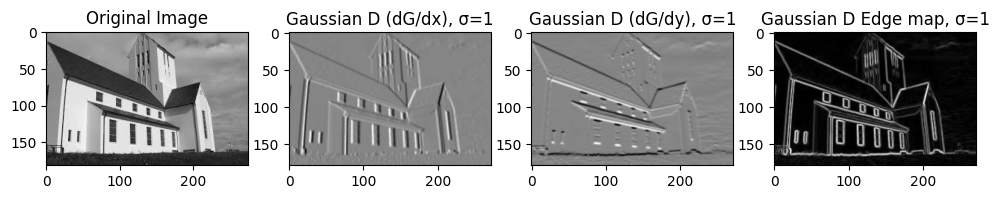

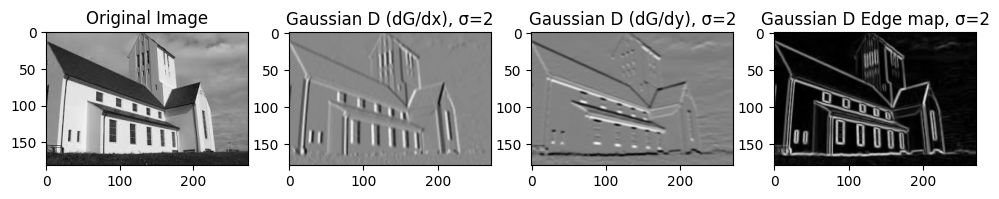

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple, Union










def gaussian_filter(window_size, sigma):
    kernel = np.zeros((window_size, window_size))
    center = window_size // 2
    for x in range(window_size):
        for y in range(window_size):
            right = np.exp(-(((x-center)**2 + (y-center)**2) / (2 * sigma**2)))
            left = 1 / ((sigma ** 2) * (2 * np.pi))
            kernel[x,y] = left * right
    # Normalize the kernel
    # kernel /= np.sum(kernel)
    # kernel /= kernel[0][0]
    return kernel
# print(gaussian_filter(5,1))


## graph
# def get_gaussian_derivatives_x_filter(window_size, sigma):

#     # left =  - ( x / (2 pi simg**4))
#     # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
#     kernel = np.zeros((window_size, window_size))
#     center = window_size // 2
#     for x in range(window_size):
#         for y in range(window_size):
#             right = np.exp(-(((x-center)**2 + (y-center)**2) / (2 * sigma**2)))
#             left = - ((y-center) / (sigma ** 2))
#             # left = - ((y-center) / (2 * np.pi * sigma ** 4))
#             kernel[x,y] = left * right
#     # Normalize the kernel
#     # kernel /= np.sum(kernel)
#     # kernel /= kernel[0][0]
#     return kernel
# print(get_gaussian_derivatives_x_filter(5,1))

# def get_gaussian_derivatives_y_filter(window_size, sigma):

#     # left =  - ( x / (2 pi simg**4))
#     # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
#     kernel = np.zeros((window_size, window_size))
#     center = window_size // 2
#     for x in range(window_size):
#         for y in range(window_size):
#             right = np.exp(-(((x-center)**2 + (y-center)**2) / (2 * sigma**2)))
#             left = - ((x-center) / (sigma ** 2))
#             # left = - ((x-center) / (2 * np.pi * sigma ** 4))
#             kernel[x,y] = left * right
#     # Normalize the kernel
#     # kernel /= np.sum(kernel)
#     # kernel /= kernel[0][0]
#     return kernel
# print(get_gaussian_derivatives_y_filter(5,1))



## slides gaussian derivative
def get_gaussian_derivatives_x_filter(window_size, sigma):

    # left =  - ( x / (2 pi simg**4))
    # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
    kernel = np.zeros((window_size, window_size))
    center = window_size // 2
    for i in range(window_size):
        for j in range(window_size):
            x = j - center
            y= center - i
            right = np.exp(-(((j - center)**2 + (center - i)**2) / (2 * sigma**2)))
            left = - ((j - center) / (sigma ** 2))
            # left = - ((j - center) / (2 * np.pi * sigma ** 4))
            kernel[i,j] = left * right
    # Normalize the kernel
    # kernel /= np.sum(kernel)
    # kernel /= kernel[0][0]
    return kernel
# print(get_gaussian_derivatives_x_filter(5,1))

def get_gaussian_derivatives_y_filter(window_size, sigma):

    # left =  - ( x / (2 pi simg**4))
    # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
    kernel = np.zeros((window_size, window_size))
    center = window_size // 2
    for i in range(window_size):
        for j in range(window_size):
            x = j - center
            y= center - i
            right = np.exp(-(((j - center)**2 + (center - i)**2) / (2 * sigma**2)))
            left = - ((center - i)/ (sigma ** 2))
            # left = - ((center - i)/ (2 * np.pi * sigma ** 4))
            kernel[i,j] = left * right
    # Normalize the kernel
    # kernel /= np.sum(kernel)
    # kernel /= kernel[0][0]
    return kernel
# print(get_gaussian_derivatives_y_filter(5,1))

## convolution
## ref: https://github.com/detkov/Convolution-From-Scratch
## rework
def add_padding(matrix: np.ndarray, padding: Tuple[int, int]) -> np.ndarray:
    n, m = matrix.shape
    r, c = padding
    # padding row = matrix row + two * kernel row
    padded_matrix = np.zeros((n + r * 2, m + c * 2))
    # copy matrix to padding matrix with original context
    padded_matrix[r : n + r, c : m + c] = matrix
    return padded_matrix


def _check_params(matrix, kernel, stride: Tuple[int, int], dilation: Tuple[int, int], padding: Tuple[int, int]):
    # all integers should be positive >= 1
    params_are_correct = (isinstance(stride[0], int)   and isinstance(stride[1], int)   and
                          isinstance(dilation[0], int) and isinstance(dilation[1], int) and
                          isinstance(padding[0], int)  and isinstance(padding[1], int)  and
                          stride[0]   >= 1 and stride[1]   >= 1 and 
                          dilation[0] >= 1 and dilation[1] >= 1 and
                          padding[0]  >= 0 and padding[1]  >= 0)
    # condition failed
    if not params_are_correct:
        assert params_are_correct, 'Parameters should be integers equal or greater than default values.'
        return None
    # convert matrix to np array
    if not isinstance(matrix, np.ndarray):
        matrix = np.array(matrix)
    n, m = matrix.shape
    # check if any padding, yes reconstruct
    if list(padding) == [0, 0]:
        matrix = matrix
    else:
        matrix = add_padding(matrix, padding)
    n_p, m_p = matrix.shape

    # convert kernel to np array
    if not isinstance(kernel, np.ndarray):
        kernel = np.array(kernel)
    k = kernel.shape
    matrix_to_kernel_is_correct = n_p >= k[0] and m_p >= k[1]
    assert matrix_to_kernel_is_correct, 'Kernel shape must smaller than matrix shape'
    
    # output matrix shape after convolution
    # (Input window_size + 2*Padding – ((Filter window_size – 1)*Dilation Factor + 1))/Stride + 1
    r_out = np.floor((n + 2 * padding[0] - ( (dilation[0]*(k[0]-1)) +1) ) / stride[0]).astype(int) + 1
    c_out = np.floor((m + 2 * padding[1] - ( (dilation[1]*(k[1]-1)) +1) ) / stride[1]).astype(int) + 1

    out_dimensions_true = r_out > 0 and c_out > 0
    assert out_dimensions_true, 'One of resulting output dimension is non-positive.'

    return matrix, kernel, r_out, c_out

## convolution
## ref: https://github.com/detkov/Convolution-From-Scratch
## rework
def convolution2d(matrix: Union[List[List[float]], np.ndarray], kernel: Union[List[List[float]], np.ndarray], stride: Tuple[int, int] = (1, 1), dilation: Tuple[int, int] = (1, 1), padding: Tuple[int, int] = (0, 0)) -> np.ndarray:
    # check matrix, kernel is correct shape
    matrix, kernel, h_out, w_out = _check_params(matrix, kernel, stride, dilation, padding)
    # set output shape
    matrix_out = np.zeros((h_out, w_out))

    # find center kernel position
    b = (kernel.shape[0] // 2, kernel.shape[1] // 2)
    # find input matrix center position
    center_x_0 = b[0] * dilation[0]
    center_y_0 = b[1] * dilation[1]
    # start input matrix height |
    for i in range(h_out):
        # find positions of height x, in the submatrix
        center_x = center_x_0 + i * stride[0]
        # get all rows index in the submatrix
        indices_x = [center_x + l * dilation[0] for l in range(-b[0], b[0] + 1)]
        
        for j in range(w_out):
            # find the positions of width y, in the submatrix
            center_y = center_y_0 + j * stride[1]
            # get all index y of the submatrix
            indices_y = [center_y + l * dilation[1] for l in range(-b[1], b[1] + 1)]
            # find the submatrix
            submatrix = matrix[indices_x, :][:, indices_y]
            # element-wise mutiple and sum all the results
            matrix_out[i][j] = np.sum(np.multiply(submatrix, kernel))
    return matrix_out

## sobel operation
def get_sobel_x_3_3(gradient_value = 1/8, omits= False):
    standard_sobel_operator = np.array([[-1,0,1],
                                        [-2,0,2],
                                        [-1,0,1],
                                        ], dtype="float64")
    gradient_value = gradient_value
    if not omits:
        standard_sobel_operator *= gradient_value
            
    return standard_sobel_operator


def get_sobel_y_3_3(gradient_value = 1/8, omits= False):
    standard_sobel_operator = np.array([[1,2,1],
                                        [0,0,0],
                                        [-1,-2,-1],
                                        ], dtype="float64")
    gradient_value = gradient_value
    if not omits:
        standard_sobel_operator *= gradient_value
            
    return standard_sobel_operator

def get_edge_map(gradient_x, gradient_y):
    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # # Normalize the gradient magnitude to convert it to the range [0, 255]
    # gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return gradient_magnitude



image = cv2.imread("ex1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # part a1

# plt.figure(figsize=(12,12))

# plt.subplot(1, 3, 1)
# plt.imshow(gray_image, cmap='gray')
# plt.title('Original Image')
# # plt.axis('off')

# window_size = 5  # Kernel window_size (should be odd)
# sigma = 1  # Standard deviation of Gaussian distribution

# gaussian_kernel_5_1 = gaussian_filter(window_size, sigma)
# smoothed_image_5_1 = convolution2d(gray_image, gaussian_kernel_5_1)


# plt.subplot(1, 3, 2)
# plt.imshow(smoothed_image_5_1, cmap='gray')
# plt.title('Smoothed Image (\u03C3={})'.format(sigma) )
# # plt.axis('off')


# # part a2

# window_size = 5  
# sigma = 2  

# gaussian_kernel_5_2 = gaussian_filter(window_size, sigma)
# smoothed_image_5_2 = convolution2d(gray_image, gaussian_kernel_5_2)

# plt.subplot(1, 3, 3)
# plt.imshow(smoothed_image_5_2, cmap='gray')
# plt.title('Smoothed Image (\u03C3={})'.format(sigma) )
# # plt.axis('off')
# plt.show()


# # part b1

# window_size = 5
# sigma = 1

# gaussian_kernel_5_1 = gaussian_filter(window_size, sigma)
# smoothed_image_5_1 = convolution2d(gray_image, gaussian_kernel_5_1)

# # gaussian_kernel_5_1 = gaussian_filter(window_size, sigma)
# # smoothed_image_5_1 = convolution2d(gray_image, gaussian_kernel_5_1)

# sobel_operator_x = get_sobel_x_3_3(omits=True)
# sobel_operator_y = get_sobel_y_3_3(omits=True)


# sobel_operator_x_ed_5_1_image = convolution2d(smoothed_image_5_1, sobel_operator_x)
# sobel_operator_y_ed_5_1_image = convolution2d(smoothed_image_5_1, sobel_operator_y)


# sobel_operator_xy_ed_5_1_image = get_edge_map(sobel_operator_x_ed_5_1_image,sobel_operator_y_ed_5_1_image)

# plt.figure(figsize=(12,12))

# plt.subplot(1, 4, 1)
# plt.imshow(smoothed_image_5_1, cmap='gray')
# plt.title('Smoothed Image (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 2)
# plt.imshow(sobel_operator_x_ed_5_1_image, cmap='gray')
# plt.title('X Edge, (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 3)
# plt.imshow(sobel_operator_y_ed_5_1_image, cmap='gray')
# plt.title('Y Edge, (\u03C3={})'.format(sigma) )
# # plt.axis('off')


# plt.subplot(1, 4, 4)
# plt.imshow(sobel_operator_xy_ed_5_1_image, cmap='gray')
# plt.title('Edge map, (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.show()


# # part b2

# window_size = 5
# sigma = 2  

# gaussian_kernel_5_2 = gaussian_filter(window_size, sigma)
# smoothed_image_5_2 = convolution2d(gray_image, gaussian_kernel_5_2)

# # gaussian_kernel_5_2 = gaussian_filter(window_size, sigma)
# # smoothed_image_5_2 = convolution2d(gray_image, gaussian_kernel_5_2)

# sobel_operator_x = get_sobel_x_3_3(omits=True)
# sobel_operator_y = get_sobel_y_3_3(omits=True)

# sobel_operator_x_ed_5_2_image = convolution2d(smoothed_image_5_2, sobel_operator_x)
# sobel_operator_y_ed_5_2_image = convolution2d(smoothed_image_5_2, sobel_operator_y)


# sobel_operator_xy_ed_5_2_image = get_edge_map(sobel_operator_x_ed_5_2_image,sobel_operator_y_ed_5_2_image)


# plt.figure(figsize=(12,12))

# plt.subplot(1, 4, 1)
# plt.imshow(smoothed_image_5_2, cmap='gray')
# plt.title('Smoothed Image (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 2)
# plt.imshow(sobel_operator_x_ed_5_2_image, cmap='gray')
# plt.title('X Edge, (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 3)
# plt.imshow(sobel_operator_y_ed_5_2_image, cmap='gray')
# plt.title('Y Edge, (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.subplot(1, 4, 4)
# plt.imshow(sobel_operator_xy_ed_5_2_image, cmap='gray')
# plt.title('Edge map, (\u03C3={})'.format(sigma) )
# # plt.axis('off')

# plt.show()


# part c

window_size = 5
sigma = 1  


gaussian_derivatives_x_filter_5_1 = get_gaussian_derivatives_x_filter(window_size,sigma)
gaussian_derivatives_y_filter_5_1 = get_gaussian_derivatives_y_filter(window_size,sigma)

gaussian_derivatives_x_filter_5_1_image = convolution2d(gray_image, gaussian_derivatives_x_filter_5_1)
gaussian_derivatives_y_filter_5_1_image = convolution2d(gray_image, gaussian_derivatives_y_filter_5_1)

gaussian_derivatives_xy_filter_5_1_image = get_edge_map(gaussian_derivatives_x_filter_5_1_image,gaussian_derivatives_y_filter_5_1_image)


plt.figure(figsize=(12,12))

plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image{}'.format("") )
# plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gaussian_derivatives_x_filter_5_1_image, cmap='gray')
plt.title('Gaussian D (dG/dx), \u03C3={}'.format(sigma) )
# plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gaussian_derivatives_y_filter_5_1_image, cmap='gray')
plt.title('Gaussian D (dG/dy), \u03C3={}'.format(sigma) )
# plt.axis('off')


plt.subplot(1, 4, 4)
plt.imshow(gaussian_derivatives_xy_filter_5_1_image, cmap='gray')
plt.title('Gaussian D Edge map, \u03C3={}'.format(sigma) )
# plt.axis('off')

plt.show()



window_size = 5
sigma = 2


gaussian_derivatives_x_filter_5_2 = get_gaussian_derivatives_x_filter(window_size,sigma)
gaussian_derivatives_y_filter_5_2 = get_gaussian_derivatives_y_filter(window_size,sigma)


gaussian_derivatives_x_filter_5_2_image = convolution2d(gray_image, gaussian_derivatives_x_filter_5_2)
gaussian_derivatives_y_filter_5_2_image = convolution2d(gray_image, gaussian_derivatives_y_filter_5_2)

gaussian_derivatives_xy_filter_5_2_image = get_edge_map(gaussian_derivatives_x_filter_5_2_image,gaussian_derivatives_y_filter_5_2_image)


plt.figure(figsize=(12,12))

plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image{}'.format("") )
# plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gaussian_derivatives_x_filter_5_2_image, cmap='gray')
plt.title('Gaussian D (dG/dx), \u03C3={}'.format(sigma) )
# plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gaussian_derivatives_y_filter_5_2_image, cmap='gray')
plt.title('Gaussian D (dG/dy), \u03C3={}'.format(sigma) )
# plt.axis('off')


plt.subplot(1, 4, 4)
plt.imshow(gaussian_derivatives_xy_filter_5_2_image, cmap='gray')
plt.title('Gaussian D Edge map, \u03C3={}'.format(sigma) )
# plt.axis('off')

plt.show()

***

### Please explain what do you observe comparing the final output of b and c (10%).

Noise Sensitivity:

the edge map of 'b' is sensitive to the noise in the image

the edge map of 'c' is not very sensitive to the noise like Sobel in the image

<br>

Edge Thickness:

the edge map of 'b' has a thicker edge than 'c' because the Gaussian filter on 'b' makes the image on 'b' bluer and the edge of 'b' thicker

the edge map of 'c' produces smoother edges due to prior smoothing

the edge map of 'b' produces more defined edges

<br>

gradient of x,y:

the dark, bright colour of a edge is different

<br>

bluerness:

b is bluer than c

***

## Problem 2. Corner Detection (50%)

***

threshold = 77018069862.80


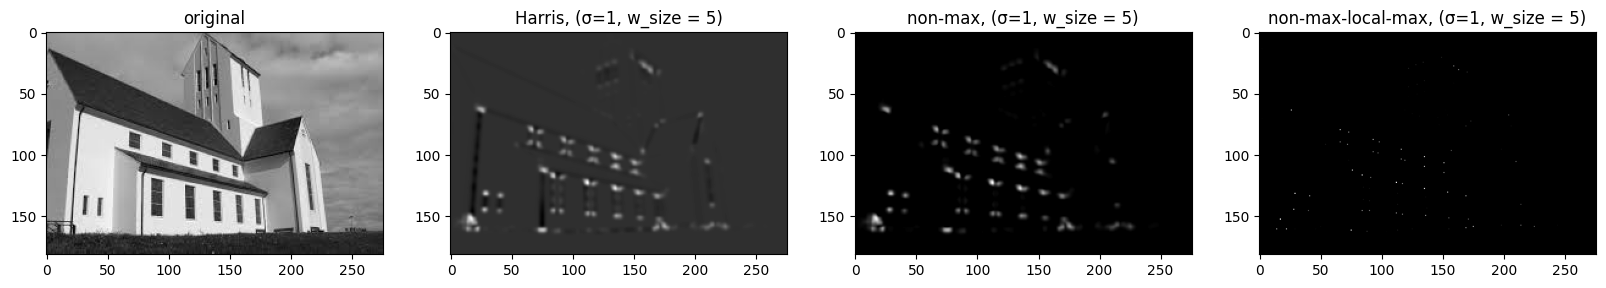

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple, Union
import numpy as np








def gaussian_filter(window_size, sigma):
    kernel = np.zeros((window_size, window_size))
    center = window_size // 2
    for x in range(window_size):
        for y in range(window_size):
            right = np.exp(-(((x-center)**2 + (y-center)**2) / (2 * sigma**2)))
            left = 1 / ((sigma ** 2) * (2 * np.pi))
            kernel[x,y] = left * right
    # Normalize the kernel
    # kernel /= np.sum(kernel)
    # kernel /= kernel[0][0]
    return kernel
# print(gaussian_filter(5,1))


## graph
# def get_gaussian_derivatives_x_filter(window_size, sigma):

#     # left =  - ( x / (2 pi simg**4))
#     # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
#     kernel = np.zeros((window_size, window_size))
#     center = window_size // 2
#     for x in range(window_size):
#         for y in range(window_size):
#             right = np.exp(-(((x-center)**2 + (y-center)**2) / (2 * sigma**2)))
#             left = - ((y-center) / (sigma ** 2))
#             # left = - ((y-center) / (2 * np.pi * sigma ** 4))
#             kernel[x,y] = left * right
#     # Normalize the kernel
#     # kernel /= np.sum(kernel)
#     # kernel /= kernel[0][0]
#     return kernel
# print(get_gaussian_derivatives_x_filter(5,1))

# def get_gaussian_derivatives_y_filter(window_size, sigma):

#     # left =  - ( x / (2 pi simg**4))
#     # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
#     kernel = np.zeros((window_size, window_size))
#     center = window_size // 2
#     for x in range(window_size):
#         for y in range(window_size):
#             right = np.exp(-(((x-center)**2 + (y-center)**2) / (2 * sigma**2)))
#             left = - ((x-center) / (sigma ** 2))
#             # left = - ((x-center) / (2 * np.pi * sigma ** 4))
#             kernel[x,y] = left * right
#     # Normalize the kernel
#     # kernel /= np.sum(kernel)
#     # kernel /= kernel[0][0]
#     return kernel
# print(get_gaussian_derivatives_y_filter(5,1))



## slides gaussian derivative
def get_gaussian_derivatives_x_filter(window_size, sigma):

    # left =  - ( x / (2 pi simg**4))
    # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
    kernel = np.zeros((window_size, window_size))
    center = window_size // 2
    for i in range(window_size):
        for j in range(window_size):
            x = j - center
            y= center - i
            right = np.exp(-(((j - center)**2 + (center - i)**2) / (2 * sigma**2)))
            left = - ((j - center) / (sigma ** 2))
            # left = - ((j - center) / (2 * np.pi * sigma ** 4))
            kernel[i,j] = left * right
    # Normalize the kernel
    # kernel /= np.sum(kernel)
    # kernel /= kernel[0][0]
    return kernel
# print(get_gaussian_derivatives_x_filter(5,1))

def get_gaussian_derivatives_y_filter(window_size, sigma):

    # left =  - ( x / (2 pi simg**4))
    # right = np.exp(-(((x)**2 + (y-center)**2) / (2 * sigma**2)))
    kernel = np.zeros((window_size, window_size))
    center = window_size // 2
    for i in range(window_size):
        for j in range(window_size):
            x = j - center
            y= center - i
            right = np.exp(-(((j - center)**2 + (center - i)**2) / (2 * sigma**2)))
            left = - ((center - i)/ (sigma ** 2))
            # left = - ((center - i)/ (2 * np.pi * sigma ** 4))
            kernel[i,j] = left * right
    # Normalize the kernel
    # kernel /= np.sum(kernel)
    # kernel /= kernel[0][0]
    return kernel
# print(get_gaussian_derivatives_y_filter(5,1))


## convolution
## ref: https://github.com/detkov/Convolution-From-Scratch
## rework
def add_padding(matrix: np.ndarray, padding: Tuple[int, int]) -> np.ndarray:
    n, m = matrix.shape
    r, c = padding
    # padding row = matrix row + two * kernel row
    padded_matrix = np.zeros((n + r * 2, m + c * 2))
    # copy matrix to padding matrix with original context
    padded_matrix[r : n + r, c : m + c] = matrix
    return padded_matrix


def _check_params(matrix, kernel, stride: Tuple[int, int], dilation: Tuple[int, int], padding: Tuple[int, int]):
    # all integers should be positive >= 1
    params_are_correct = (isinstance(stride[0], int)   and isinstance(stride[1], int)   and
                          isinstance(dilation[0], int) and isinstance(dilation[1], int) and
                          isinstance(padding[0], int)  and isinstance(padding[1], int)  and
                          stride[0]   >= 1 and stride[1]   >= 1 and 
                          dilation[0] >= 1 and dilation[1] >= 1 and
                          padding[0]  >= 0 and padding[1]  >= 0)
    # condition failed
    if not params_are_correct:
        assert params_are_correct, 'Parameters should be integers equal or greater than default values.'
        return None
    # convert matrix to np array
    if not isinstance(matrix, np.ndarray):
        matrix = np.array(matrix)
    n, m = matrix.shape
    # check if any padding, yes reconstruct
    if list(padding) == [0, 0]:
        matrix = matrix
    else:
        matrix = add_padding(matrix, padding)
    n_p, m_p = matrix.shape

    # convert kernel to np array
    if not isinstance(kernel, np.ndarray):
        kernel = np.array(kernel)
    k = kernel.shape
    matrix_to_kernel_is_correct = n_p >= k[0] and m_p >= k[1]
    assert matrix_to_kernel_is_correct, 'Kernel shape must smaller than matrix shape'
    
    # output matrix shape after convolution
    # (Input window_size + 2*Padding – ((Filter window_size – 1)*Dilation Factor + 1))/Stride + 1
    r_out = np.floor((n + 2 * padding[0] - ( (dilation[0]*(k[0]-1)) +1) ) / stride[0]).astype(int) + 1
    c_out = np.floor((m + 2 * padding[1] - ( (dilation[1]*(k[1]-1)) +1) ) / stride[1]).astype(int) + 1

    out_dimensions_true = r_out > 0 and c_out > 0
    assert out_dimensions_true, 'One of resulting output dimension is non-positive.'

    return matrix, kernel, r_out, c_out

## convolution
## ref: https://github.com/detkov/Convolution-From-Scratch
## rework
def convolution2d(matrix: Union[List[List[float]], np.ndarray], kernel: Union[List[List[float]], np.ndarray], stride: Tuple[int, int] = (1, 1), dilation: Tuple[int, int] = (1, 1), padding: Tuple[int, int] = (0, 0)) -> np.ndarray:
    # check matrix, kernel is correct shape
    matrix, kernel, h_out, w_out = _check_params(matrix, kernel, stride, dilation, padding)
    # set output shape
    matrix_out = np.zeros((h_out, w_out))

    # find center kernel position
    b = (kernel.shape[0] // 2, kernel.shape[1] // 2)
    # find input matrix center position
    center_x_0 = b[0] * dilation[0]
    center_y_0 = b[1] * dilation[1]
    # start input matrix height |
    for i in range(h_out):
        # find positions of height x, in the submatrix
        center_x = center_x_0 + i * stride[0]
        # get all rows index in the submatrix
        indices_x = [center_x + l * dilation[0] for l in range(-b[0], b[0] + 1)]
        
        for j in range(w_out):
            # find the positions of width y, in the submatrix
            center_y = center_y_0 + j * stride[1]
            # get all index y of the submatrix
            indices_y = [center_y + l * dilation[1] for l in range(-b[1], b[1] + 1)]
            # find the submatrix
            submatrix = matrix[indices_x, :][:, indices_y]
            # element-wise mutiple and sum all the results
            matrix_out[i][j] = np.sum(np.multiply(submatrix, kernel))
    return matrix_out

## sobel operation
def get_sobel_x_3_3(gradient_value = 1/8, omits= False):
    standard_sobel_operator = np.array([[-1,0,1],
                                        [-2,0,2],
                                        [-1,0,1],
                                        ], dtype="float64")
    gradient_value = gradient_value
    if not omits:
        standard_sobel_operator *= gradient_value
            
    return standard_sobel_operator


def get_sobel_y_3_3(gradient_value = 1/8, omits= False):
    standard_sobel_operator = np.array([[1,2,1],
                                        [0,0,0],
                                        [-1,-2,-1],
                                        ], dtype="float64")
    gradient_value = gradient_value
    if not omits:
        standard_sobel_operator *= gradient_value
            
    return standard_sobel_operator

def get_edge_map(gradient_x, gradient_y):
    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # # Normalize the gradient magnitude to convert it to the range [0, 255]
    # gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return gradient_magnitude


def harris_corner_detector(image, window_size, sigma, k):

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    height = gray_image.shape[0]
    width = gray_image.shape[1]

    sobel_operator_x = get_sobel_x_3_3(omits=True)
    sobel_operator_y = get_sobel_y_3_3(omits=True)
    Ix = convolution2d(gray_image, sobel_operator_x)
    Iy = convolution2d(gray_image, sobel_operator_y)

    IxIx = Ix ** 2
    IyIy = Iy ** 2
    IxIy = Ix * Iy

    gaussian_kernel = gaussian_filter(window_size, sigma)

    IxIx = convolution2d(IxIx, gaussian_kernel)
    IyIy = convolution2d(IyIy, gaussian_kernel)
    IxIy = convolution2d(IxIy, gaussian_kernel)




    # gaussian_kernel = gaussian_filter(window_size, sigma)
    # image_blurred = convolution2d(gray_image, gaussian_kernel)

    # sobel_operator_x = get_sobel_x_3_3(omits=True)
    # sobel_operator_y = get_sobel_y_3_3(omits=True)
    # Ix = convolution2d(image_blurred, sobel_operator_x)
    # Iy = convolution2d(image_blurred, sobel_operator_y)

    # IxIx = Ix ** 2
    # IyIy = Iy ** 2
    # IxIy = Ix * Iy

    # gaussian_kernel = gaussian_filter(window_size, sigma)

    # IxIx = convolution2d(IxIx, gaussian_kernel)
    # IyIy = convolution2d(IyIy, gaussian_kernel)
    # IxIy = convolution2d(IxIy, gaussian_kernel)



    # gaussian_derivatives_x_filter = get_gaussian_derivatives_x_filter(window_size,sigma)
    # gaussian_derivatives_y_filter = get_gaussian_derivatives_y_filter(window_size,sigma)


    # Ix = convolution2d(gray_image, gaussian_derivatives_x_filter)
    # Iy = convolution2d(gray_image, gaussian_derivatives_y_filter)

    # IxIx = Ix ** 2
    # IyIy = Iy ** 2
    # IxIy = Ix * Iy



    offset = window_size // 2  # offset from the edge of the image so the all window will be inside the image
    image_R_matrix = np.zeros((height, width))
    # go over each pixel
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            #  step 4: compute the element of the M matrix
            Sxx = np.sum(IxIx[y-offset:y+offset+1, x-offset:x+offset+1])
            Syy = np.sum(IyIy[y-offset:y+offset+1, x-offset:x+offset+1])
            Sxy = np.sum(IxIy[y-offset:y+offset+1, x-offset:x+offset+1])
            M_matrix = np.array([[Sxx, Sxy], [Sxy, Syy]])
            harris_response = np.linalg.det(M_matrix) - k * (np.trace(M_matrix) ** 2)
            image_R_matrix[y, x] = harris_response

    # plt.show()
    return image_R_matrix

def non_maximum_suppression(R, threshold):
# def non_maximum_suppression(R, threshold, window_size):
    # # Pad the corner response matrix to handle edge cases
    # padded_R = np.pad(R, ((window_size//2, window_size//2), (window_size//2, window_size//2)), mode='constant')
    
    # Initialize the suppressed corner response matrix
    suppressed_R_local_max = np.zeros_like(R)
    
    # Iterate over each pixel in the corner response matrix
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            # # Extract the neighborhood around the current pixel
            # neighborhood = padded_R[i:i+window_size, j:j+window_size]
            
            # # Compute the maximum value within the neighborhood
            # max_value = np.max(neighborhood)
            
            # Perform non-maximum suppression
            # if R[i, j] >= threshold and R[i, j] == max_value:
            if R[i, j] >= threshold :
                suppressed_R_local_max[i, j] = R[i, j]
    return suppressed_R_local_max


def non_maximum_suppression_local_max(R, threshold, window_size):
    # Pad the corner response matrix to handle edge cases
    padded_R = np.pad(R, ((window_size//2, window_size//2), (window_size//2, window_size//2)), mode='constant')
    
    # Initialize the suppressed corner response matrix
    suppressed_R_local_max = np.zeros_like(R)
    
    # Iterate over each pixel in the corner response matrix
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            # Extract the neighborhood around the current pixel
            neighborhood = padded_R[i:i+window_size, j:j+window_size]
            
            # Compute the maximum value within the neighborhood
            max_value = np.max(neighborhood)
            
            # Perform non-maximum suppression
            if R[i, j] >= threshold and R[i, j] == max_value:
                suppressed_R_local_max[i, j] = R[i, j]
    return suppressed_R_local_max


image = cv2.imread("ex1.png")


window_size = 5  # Kernel window_size (should be odd)
sigma = 1  # Standard deviation of Gaussian distribution
k = 0.04



image_R_matrix = harris_corner_detector(image=image,window_size=window_size, sigma=sigma, k = k)
plt.figure(figsize=(20,20))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('original')

plt.subplot(1, 4, 2)
plt.imshow(image_R_matrix, cmap='gray')
plt.title('Harris, (\u03C3={}, w_size = {})'.format(sigma, window_size) )


threshold = 0.01 * image_R_matrix.max()

print('threshold = {:0.2f}'.format(threshold) )

suppressed_R = non_maximum_suppression(image_R_matrix , threshold)
plt.subplot(1, 4, 3)
plt.imshow(suppressed_R, cmap='gray')
plt.title('non-max, (\u03C3={}, w_size = {})'.format( sigma, window_size) )
# plt.show()



suppressed_R_local_max = non_maximum_suppression_local_max(image_R_matrix , threshold, window_size)
plt.subplot(1, 4, 4)
plt.imshow(suppressed_R_local_max, cmap='gray')
plt.title('non-max-local-max, (\u03C3={}, w_size = {})'.format( sigma, window_size) )
plt.show()


***